In [17]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_data(file: str) -> pd.DataFrame:
    data = []
    with open(f"data\\{file}", "r") as file:
        for idx, line in enumerate(file.readlines()):
            # Skip Metadata lines
            if idx in [0, 1, 2, 3, 4, 6]:
                continue

            data.append(line)

    return pd.read_csv(StringIO("".join(data)))

In [49]:
brush_tests = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "5a",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
]

dataframes = {}
for brush in brush_tests:
    dataframes[brush] = get_data(f"Ankenman brushes_{brush}.txt")

dataframes["1"].head()

,Time (s),Load (lbf),Crosshead (in)
0,0.4,0,0.000
1,0.6,0,0.000
2,0.8,0,0.000
3,1.0,0,0.001
4,1.2,0,0.001


In [88]:
def plot_brushes(brushes: list[str]) -> None:
    plot_dataframes = {k: dataframes[k] for k in brushes}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    for label, df in plot_dataframes.items():
        # Lbf Plot
        ax[0].plot(df["Time (s)"], df["Load (lbf)"], label=f"Brush {label}")
        ax[0].hlines(
            y=df["Load (lbf)"].max(),
            xmin=df["Time (s)"].min(),
            xmax=df["Time (s)"].max(),
            color="black",
            linestyles="dashed",
        )
        ax[0].text(
            0.5,
            df["Load (lbf)"].max() + 1,
            f"Max Load Brush {label}: {df['Load (lbf)'].max()}",
        )

        # Crosshead Plot
        ax[1].plot(df["Time (s)"], df["Crosshead (in)"], label=f"Brush {label}")

    fig.suptitle(f"Brush {', Brush '.join(brushes)}")

    ax[0].set_title("Load vs Time")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Load (lbf)")
    ax[0].legend(loc="lower right")

    ax[1].set_title("Crosshead vs Time")
    ax[1].set_xlabel("Time (s)")
    ax[1].set_ylabel("Crosshead (in)")
    ax[1].legend(loc="lower right")

    plt.show()

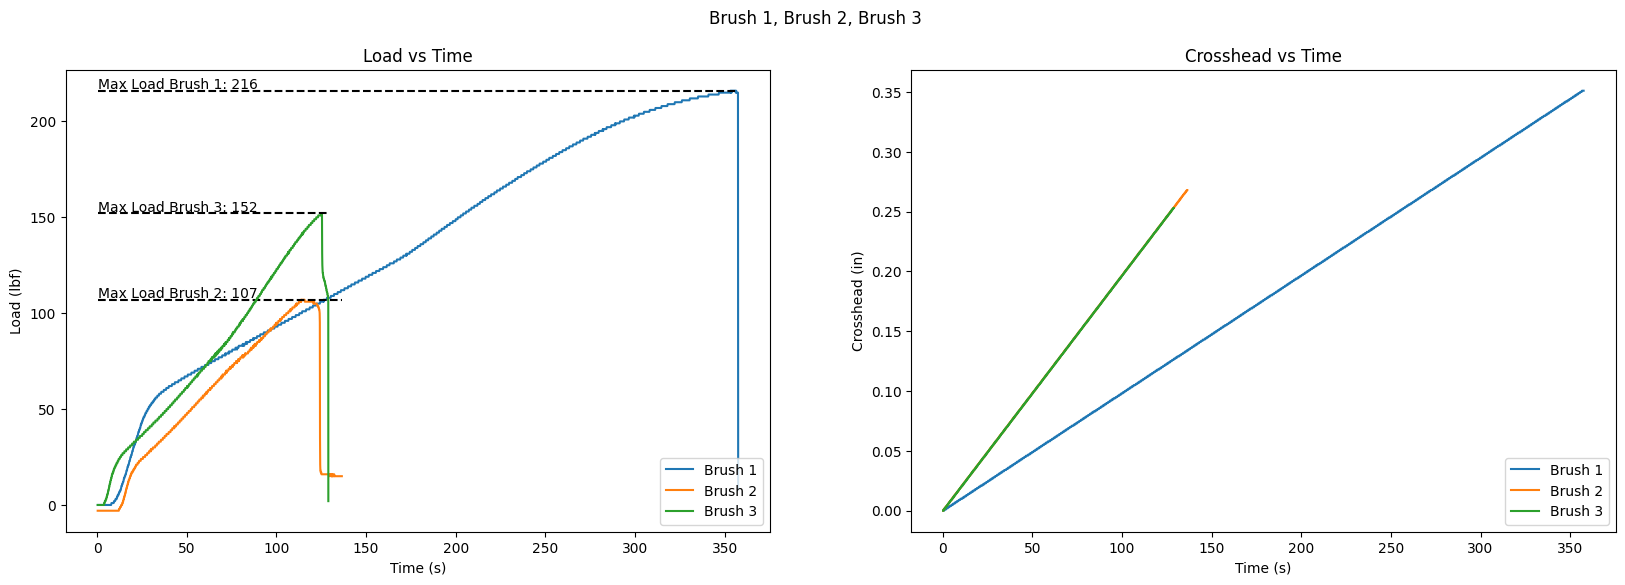

In [89]:
plot_brushes(["1", "2", "3"])

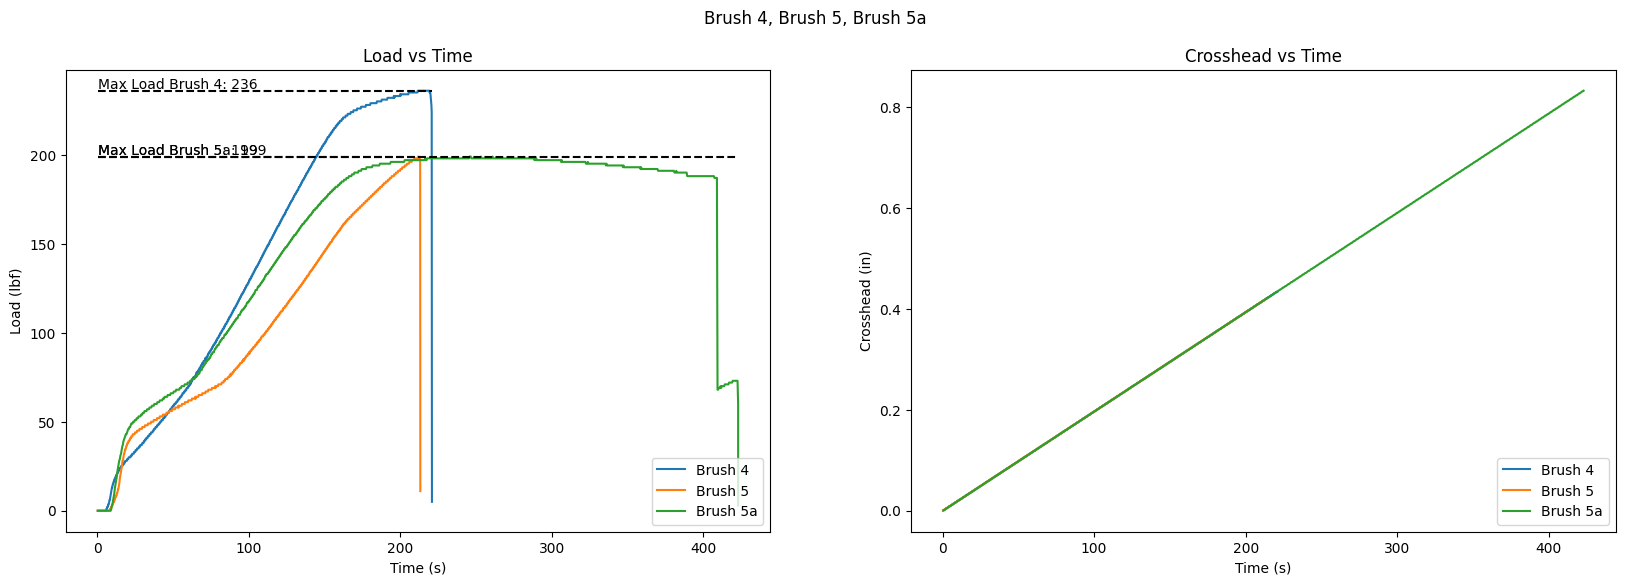

In [90]:
plot_brushes(["4", "5", "5a"])

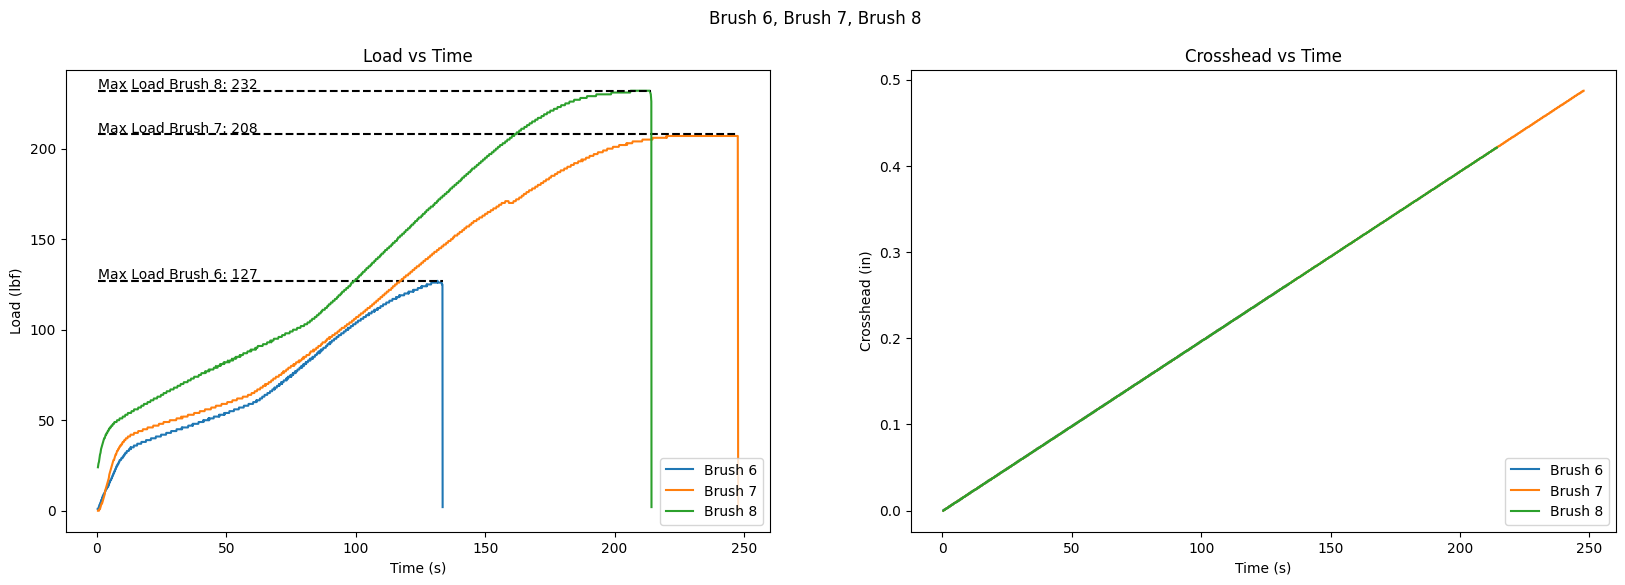

In [91]:
plot_brushes(["6", "7", "8"])

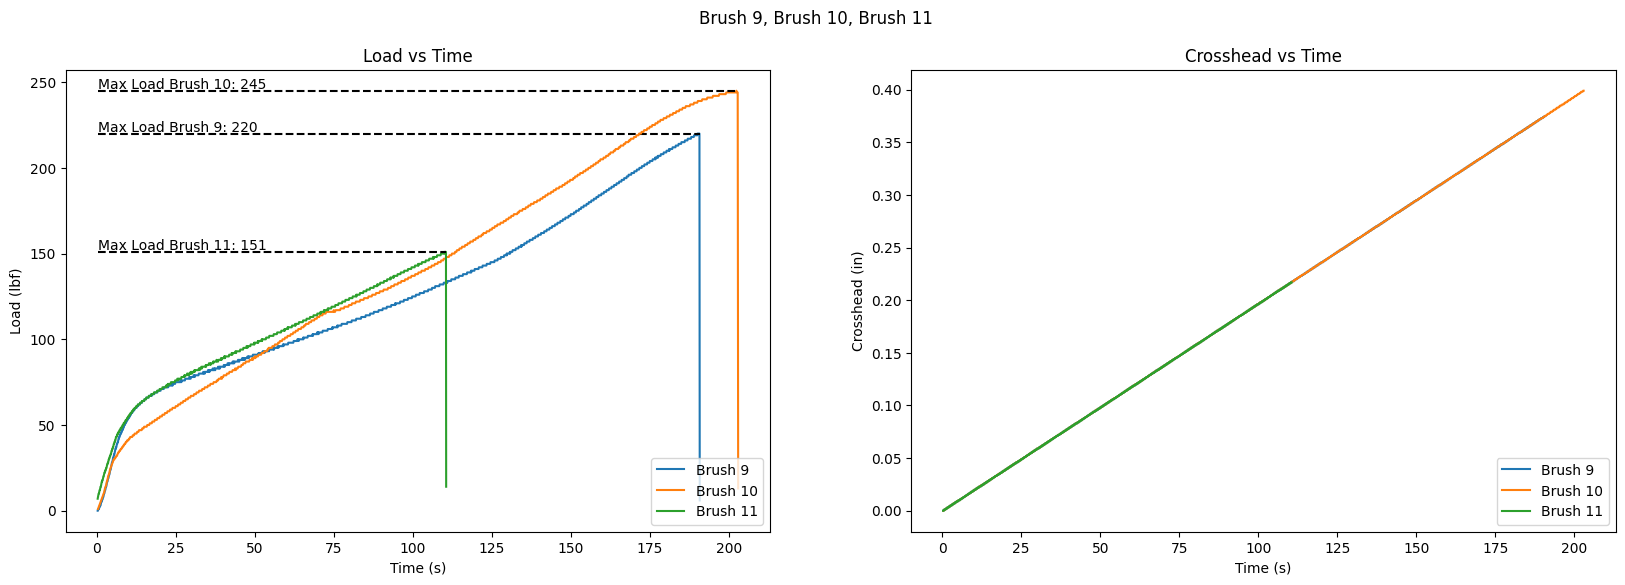

In [92]:
plot_brushes(["9", "10", "11"])

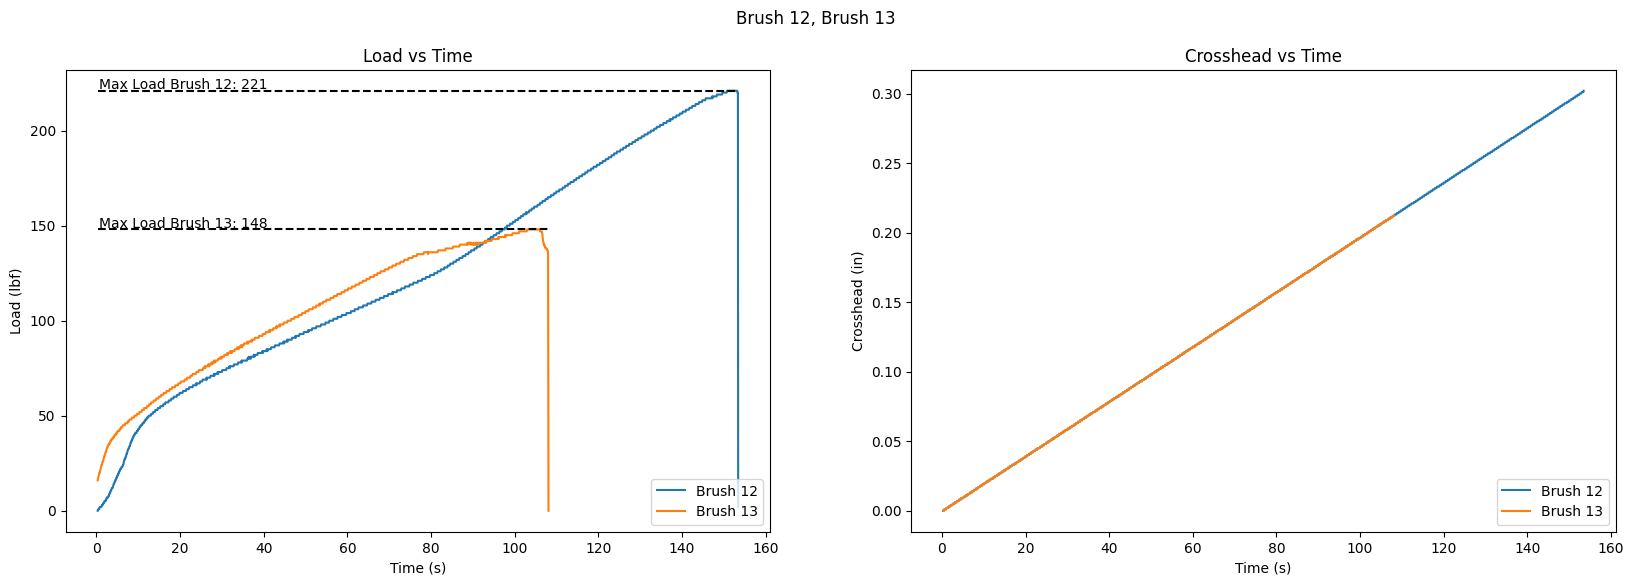

In [93]:
plot_brushes(["12", "13"])

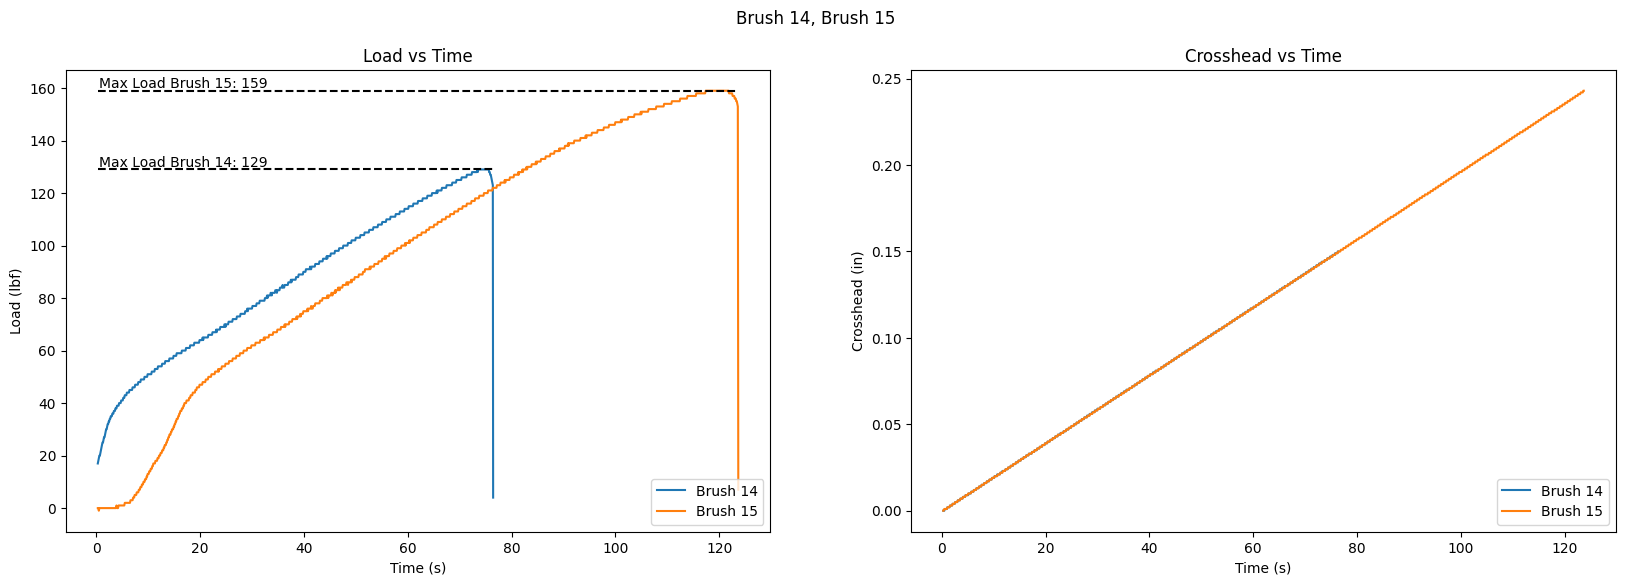

In [94]:
plot_brushes(["14", "15"])